In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage,AnnotationBbox
from matplotlib.font_manager import fontManager, FontProperties
import ptitprince as pt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pingouin as pg
import statsmodels.api as sm
import language_tool_python as ltp


def get_img(name):
     path = "font/emojis/{}.png".format(name)
     im = plt.imread(path)
     return im

def offset_image(coord, name, ax, size=0.5):
    img = get_img(name)
    im = OffsetImage(img, zoom=size)
    im.image.axes = ax
    ab = AnnotationBbox(im, (coord, 0),  xybox=(0., -21.), frameon=False,
                        xycoords='data',  boxcoords="offset points", pad=0)
    ax.add_artist(ab)

def raincloud(x, y, markersize, df, order=None, hue=None):
    # adding color
    pal = sns.color_palette()
    if df is not None:
        means = df.groupby([x])[y].mean().reindex(order)
    else:
        if len(order) > 2:
            raise Exception('Too many unique x values for this custom plot')

        mean_1 = np.mean([i[0] for i in zip(y, x) if i[1] == order[0]])
        mean_2 = np.mean([i[0] for i in zip(y, x) if i[1] == order[1]])
        means = [mean_1, mean_2]

    dodge = None
    if hue:
        means = df.groupby([x, hue])[y].mean().reindex(order)
        dodge = True
        
    sns.scatterplot(
        x=means.index,
        y=means,
        color='white',
        edgecolor='black',
        s=150/2, linewidth=1.5, zorder=4)

    ax = pt.half_violinplot(x=x, y=y, data=df, palette=pal, bw=.25, cut=0., linewidth=0,
                            scale="area", width=.7, inner=None, orient='v', zorder=1, order=order, hue=hue, dodge=dodge)
    ax = sns.stripplot(x=x, y=y, data=df, palette=pal, edgecolor="white",  linewidth=1, order=order,
                       size=markersize, orient='v', zorder=2, jitter=1, alpha=0.6, hue=hue, dodge=dodge)

    ax2 = sns.pointplot(x=x, y=y, data=df, color='black',  join=False, errorbar='se', linewidth=1,
     edgecolor='black', capsize=.06, zorder=3, bw=0, order=order, hue=hue, dodge=dodge)

/media/getz/ae930ef3-4ac4-4a95-a76a-47e9ab0a2b27/CodeProjects/Python/CognitiveReflection/venv/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


<AxesSubplot:>

Text(0.5, 1.0, 'N=61')

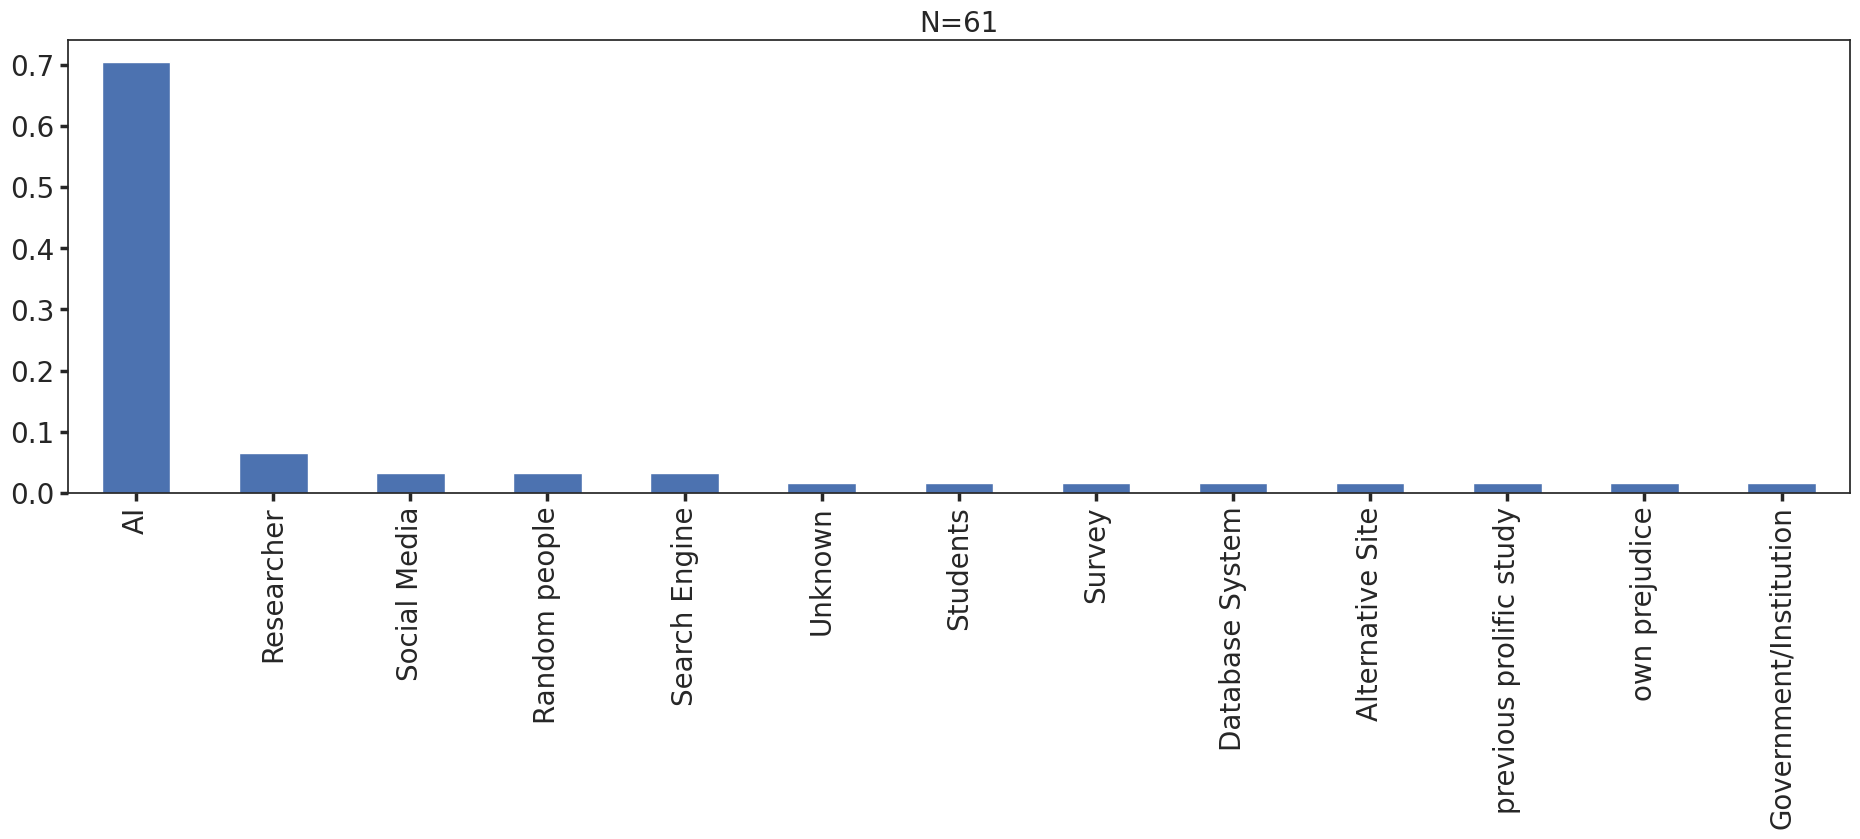

In [10]:
import pandas as pd


question = pd.DataFrame(
    {
        'prolific_id': [
            '61569ee5ec13f9d23135674e',
            '5bdb3a8a7d2000000160cc3a',
            '60ecb3f500857abf7ae07653',
            '5e1a5cd3cd15fa2dcea59c86',
            '62cfee5a0c2e87501bfb10bc',
            '5702c03e68c641000e0d754d',
            '62ceae04736349fd200814a0',
            '5870a098da731b000104a3ff',
            '6361626a199ea624d2a8b858',
            '5b9e90661641f90001d857ff',
            '5e4465013f75e52fc82f7096',
            '5fd7b5c1b6d6ef043967330c',
            '5e2b69d9cda3641bb38769b1',
            '63fc726d072344aa67fb98f7',
            '5ed51cadb2c5c106a6d1f561',
            '5ae64fb8c3c3ab00018f7e89',
            '58ab2477ea3d11000170e6e1',
            '5c3db89c112ad80001cab75e',
            '5c5404c24831db000161c5e8',
            '5d46c556fb0ce0001a04fd01',
            '6121190671d1042b24d8d67b',
            '6006a7b7f57a4801ea3a8323',
            '5ac64f340527ba0001c224fc',
            '62cebb481d8dff18f66ef320',
            '5f4ac049c374f51158b481ba',
            '57a5c633275be6000135b61c',
            '63473251dfa54bc71403c42a',
            '5dbcaecb740cc224d8d0985e',
            '5a17467d5d06850001b00c41',
            '63e62822e21e6a98fe55d267',
            '5e510d0760dd0913e45370dc',
            '5eb4396df04311266e7b5110',
            '616ef0bb9875de5db97fcb4c',
            '5aa6e3d04eecca0001ddfc96',
            '604fb38595629d1c47bdd8ae',
            '58c58d1493dac30001d49c3d',
            '5fc6a6691dd15336fcc81742',
            '610a7e09afea7de62171c59d',
            '63dc3daf33ede5b0c14e397e',
            '5bb3b490763e440001853e4f',
            '63fb8d0d8736cf01d94cb230',
            '5d3e47ba29130a00015cd41d',
            '615edb3967bc743ac381a940',
            '63e55ecaa002eb54284210e8',
            '6150e5601a0e7a3fbcfb9bfb',
            '63469f35701f6b1eb1e76b1f',
            '6005f8260fead291c70fc06e',
            '60717a4513f00ff2df378f05',
            '60dca45abca3eb229bafdedf',
            '60db6a9490422a8ae4555563',
            '58aca85e0da7f10001de92d4',
            '6071a3faff84952d04771a21',
            '62cbebd0b3641f4745d7c863',
            '61bb372340db417c1a1389c6',
            '5aabf0385e19aa00013c21a5',
            '5c7fe02f3eaee4001614f81a',
            '612b285f53d29d3549618b96',
            '60ea38c4daf970d96f76fa96',
            '62a71f84d2f2f15e6cefae40',
            '61588a883213fd00ccae7c21',
            '63e51bd397b0f5edcbf78895',
        ],
        'answer': [
            'AI',
            'AI',
            'AI',
            'Social Media',
            'AI',
            'AI',
            'Researcher',
            'AI',
            'Random people',
            'AI',
            'AI',
            'Researcher',
            'AI',
            'AI',
            'AI',
            'Unknown',
            'AI',
            'Random people',
            'AI',
            'Search Engine',
            'Students',
            'AI',
            'AI',
            'Survey',
            'Database System',
            'AI',
            'AI',
            'Search Engine',
            'AI',
            'AI',
            'AI',
            'AI',
            'AI',
            'Alternative Site',
            'AI',
            'AI',
            'AI',
            'previous prolific study',
            'AI',
            'AI',
            'Researcher',
            'AI',
            'AI',
            'Researcher',
            'AI',
            'AI',
            'AI',
            'AI',
            'AI',
            'AI',
            'AI',
            'AI',
            'AI',
            'AI',
            'own prejudice',
            'AI',
            'AI',
            'AI',
            'AI',
            'Social Media',
            'Government/Institution',
        ]})

question.answer.value_counts(normalize=True).plot(kind='bar')
import matplotlib.pyplot as plt
plt.title('N=' + str(question.prolific_id.nunique()))


In [2]:
f1 = 'HUMANS/turing_dv3_82.csv'
f2 = 'HUMANS/turing_109.csv'
f3 = 'HUMANS/turing_prolific_71.csv'

df1 = pd.read_csv(f1)
df2 = pd.read_csv(f2)
df3 = pd.read_csv(f3)

for df, n_rows, engine in zip([df1, df2, df3], [135, 138, 138], ['dv3', 'dv2', 'dv2_prolific']):
    df = df[df.prolific_id.isin(df.prolific_id.value_counts()[
                                df.prolific_id.value_counts() == n_rows].index)]

    print("complete =", (df.groupby('prolific_id').prolific_id.count() == n_rows).sum())
    print("incomplete =", (df.groupby(
        'prolific_id').prolific_id.count() != n_rows).sum())
    # print("dataset_id that are complete =", df.dataset_id.value_counts()==138)
    print("dataset_id that are incomplete =",
          [
              i for i in range(77)
              if i not in df.dataset_id.value_counts().index
          ])
    print("dataset_id that are complete =",
          [
              i for i in range(77)
              if i in df.dataset_id.value_counts().index
          ])

    print("dataset_id that are incomplete =",
          len(
              [i for i in range(77) if i not in df.dataset_id.value_counts().index]))

    df['correct'] = None
    df['correct'] = df.correct.astype(bool)
    df['agree1'] = None
    df['agree1'] = df.agree1.astype(bool)
    df['agree2'] = None
    df['agree2'] = df.agree2.astype(bool)

    df.loc[df.q_id == 2, 'correct'] = df.source == df.answer
    
    if engine == 'dv2_prolific':
        df.loc[df.q_id == 2, 'correct'] = \
            ((df.source == 'Human') & (df.answer == 'Prolific')) | ((df.source == 'AI') & (df.answer == 'Not Prolific'))
    df.loc[df.q_id == 1, 'agree2'] = df.answer.str.contains('Yes')
    df.loc[df.q_id == 0, 'agree1'] = df.answer.str.contains('Yes')

    # clear weird characters in answers
    df.loc[df.answer.str.contains('Yes'), 'answer'] = 'Yes'
    # df.loc[df.answer.str.contains('No'), 'answer'] = 'No'
    df.loc[df.answer.str.contains('AI'), 'answer'] = 'AI'
    df.loc[df.answer.str.contains('Human'), 'answer'] = 'Human'

    # add correct and agree1 to all rows where item id is the same (easier to plot)
    for i in df.item_id.unique():
        df.loc[df.item_id == i, 'correct'] = \
            df[(df.item_id == i) & (df.q_id == 2)].correct.values[0]
        df.loc[df.item_id == i, 'agree1'] = \
            df[(df.item_id == i) & (df.q_id == 0)].agree1.values[0]
        df.loc[df.item_id == i, 'agree2'] = \
            df[(df.item_id == i) & (df.q_id == 1)].agree2.values[0]

        df.loc[df.item_id == i, 'turing'] = \
            df[(df.item_id == i) & (df.q_id == 2)].answer.values[0]

    # df['agree1']
    df['agree_both'] = df.agree1 & df.agree2
    df['disagree_both'] = ~df.agree1 & ~df.agree2
    
    df['engine'] = engine
    
    exec(f'{engine} = df.copy()')

np.random.seed(123)
# TODO: keep only one subject per dataset id
ids_to_keep_dv2 = []
ids_to_keep_dv3 = []
for i in range(77):
    ids_to_keep_dv2.append(
        np.random.choice(dv2[dv2.dataset_id == i].prolific_id.unique()))
    try:
        ids_to_keep_dv3.append(
            np.random.choice(dv3[dv3.dataset_id == i].prolific_id.unique()))
    except:
        print('Index error', i)
dv2 = dv2[dv2.prolific_id.isin(ids_to_keep_dv2)]
dv3 = dv3[dv3.prolific_id.isin(ids_to_keep_dv3)]
# dv2_prolific = dv2_prolific[dv2_prolific.prolific_id.isin(ids_to_keep)]
# ids = dv2.groupby('dataset_id').prolific_id.transform('nunique') > 1
# print(ids)
df = pd.concat([dv2, dv3, dv2_prolific])


complete = 82
incomplete = 0
dataset_id that are incomplete = [76]
dataset_id that are complete = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75]
dataset_id that are incomplete = 1


/tmp/ipykernel_410127/4248346852.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['correct'] = None
/tmp/ipykernel_410127/4248346852.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['correct'] = df.correct.astype(bool)
/tmp/ipykernel_410127/4248346852.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

complete = 112
incomplete = 0
dataset_id that are incomplete = []
dataset_id that are complete = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76]
dataset_id that are incomplete = 0
complete = 71
incomplete = 0
dataset_id that are incomplete = [2, 5, 9, 12, 13, 62]
dataset_id that are complete = [0, 1, 3, 4, 6, 7, 8, 10, 11, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76]
dataset_id that are incomplete = 6
Index error 76


In [12]:
N = []
for i, engine in enumerate(('dv2', 'dv3', 'dv2_prolific')):
    N.append(len(df[df.engine == engine].prolific_id.unique()))
    print('Engine=', engine, 'N=', N[i])

n_total = len(df.prolific_id.unique())
assert n_total == sum(N)

str(question.prolific_id.isin(df[df.engine=='dv2_prolific'].prolific_id.unique()).sum()) + ' ids in dv2_prolific_last_question are in the main dataset'

Engine= dv2 N= 77
Engine= dv3 N= 76
Engine= dv2_prolific N= 71


'61 ids in dv2_prolific_last_question are in the main dataset'

In [13]:
# bonus for correct answers
bonus = df[(df.engine=='dv2_prolific') & (df.q_id==2)].groupby('prolific_id').correct.sum() * .05
# prolific_ids = ["5edfeb15743509317e9ec17c", "563f5535cbd4c60011dc9466", "60a746a3455cbbaefa083a14", "5c473c74819d580001782651", "60c283d8d82adfb1f4930352", "609bf576ae7704934d02cb52", "5e0fa4276f6d3e6adfca658a", "62d999e7f5f2cde114f4169e", "5edfd8872ec6382f20a1cd90", "5b6362cefaf7d30001e379e7", "5dc04aba55b86247c9991f89", "63bea8c366059643bc8e19da", "59637ac5d6b02c0001439808", "63d3fff8d2afe2d70a9202ba", "62cee0344bbf495f81b5643a", "60da1f2c84d5d4b2e46989c1", "60b6356523a427d506df6952", "5a7e2b4217ef350001704f52", "5b62ebb3c831f00001f60468", "6295f0cc367a8cbba24c694c", "5ef5d78781f1a703a60bf48f", "62fb7e29586929061efccda2", "5d6ed96c3fe1ac001add3be8", "5df227eb99b2821302e8dd5b", "5b438f3f7aec830001bb1a9a", "60d35d4fc34710a66ac98957", "5edd71517bdc7e9b05873eb0", "5d8f382400980b0019e21098", "5a099b6ca383a100011b49ec", "6346921046fa377ce55acbc1", "62cee0344bbf495f81b5643a", "60da1f2c84d5d4b2e46989c1", "60b6356523a427d506df6952", "5a7e2b4217ef350001704f52", "5b62ebb3c831f00001f60468", "6295f0cc367a8cbba24c694c", "5ef5d78781f1a703a60bf48f", "62fb7e29586929061efccda2", "5d6ed96c3fe1ac001add3be8", "5df227eb99b2821302e8dd5b", "5b438f3f7aec830001bb1a9a", "60d35d4fc34710a66ac98957", "5edd71517bdc7e9b05873eb0", "5d8f382400980b0019e21098", "5a099b6ca383a100011b49ec", "6346921046fa377ce55acbc1", "5b2a72f7c293b90001732b89", "637edbf206dac758898095d1", "5df7552e451be54ec34ff402", "6267bc7ac5d20db4d11af754", "5bbbcd283895e3000163213f", "62b4688a155412edaf3f73a3", "5aa69552f053610001726fd2", "5e5137be2f1d9c163f82331d", "616730370609638f039e4b59"]

for row in bonus.iteritems():
    if row[0]=='5b5f5ec19351420001b7d473':
        print(row[0]+ ',' + str(round(row[1], 2)))

    # if row 0 in 613ab311df99420815403fe9, 60772d61bc996f9fa5806f3f, 5effa1b1767027080863869d, 60e5cb4ca01a593fce9a379d, 6153144b6c389cb97e3169c3
    if row[0] in (
        '5e510d0760dd0913e45370dc','5eb4396df04311266e7b5110','616ef0bb9875de5db97fcb4c','604fb38595629d1c47bdd8ae',
        '58c58d1493dac30001d49c3d', '5aa6e3d04eecca0001ddfc96'
    ):
        # if row[0]  in prolific_ids:
        print(row[0]+ ',' + str(round(row[1], 2)))

        # print(row[0]+ ',' + str(round(row[1], 2)))

58c58d1493dac30001d49c3d,1.6
5aa6e3d04eecca0001ddfc96,0.85
5e510d0760dd0913e45370dc,1.1
5eb4396df04311266e7b5110,1.3
604fb38595629d1c47bdd8ae,1.2
616ef0bb9875de5db97fcb4c,1.85


<AxesSubplot:>

<AxesSubplot:xlabel='item_idx', ylabel='correct'>

(0.0, 1.0)

Text(0.5, 0, 'Trial')

<AxesSubplot:>

<AxesSubplot:xlabel='item_idx', ylabel='correct'>

(0.0, 1.0)

Text(0.5, 0, 'Trial')

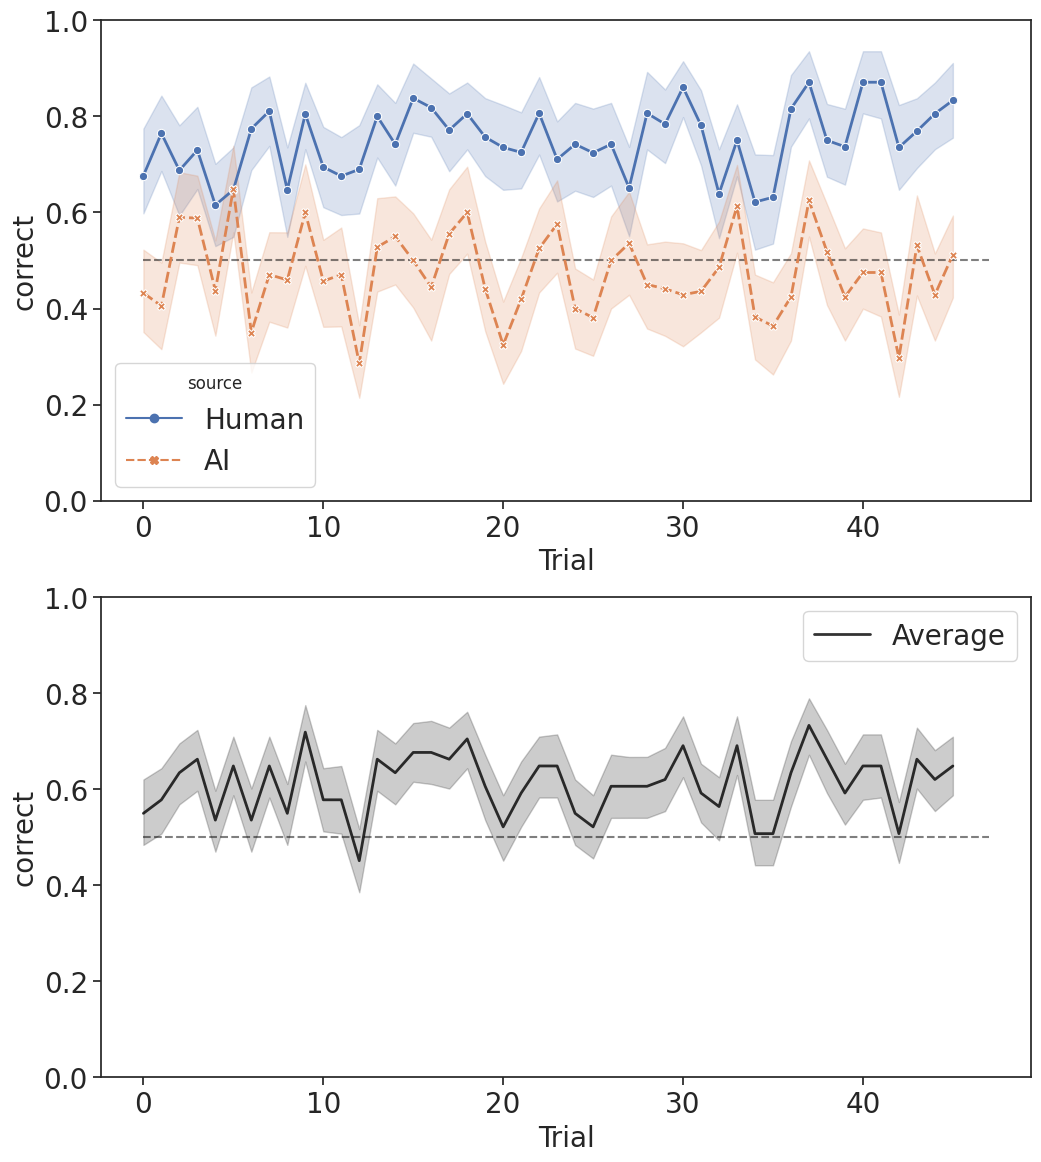

In [14]:
sns.set(
    rc={'figure.figsize':(12, 14), "figure.dpi": 100, 'legend.fontsize': 20,
        'axes.labelsize': 20, 'axes.titlesize': 20, 'xtick.labelsize': 20,
        'ytick.labelsize': 20, 'font.family': 'sans-serif',
        'font.sans-serif': 'Arial', 'text.usetex': False}
)

sns.set_palette('deep')
sns.set_style("ticks")

df2 = df[df.engine=='dv2_prolific']

# ----------------------------------------------------------------------------------------------------------------------
# PLOT 1
# ----------------------------------------------------------------------------------------------------------------------
plt.subplot(2, 1, 1)
plt.plot([0, 47], [0.5, 0.5], '--', color='black', alpha=0.5)
sns.lineplot(x='item_idx', y='correct', data=df2, hue='source',  legend=True, linewidth=2, markers=True, style='source')
plt.ylim(0, 1)
plt.xlabel('Trial')

# ----------------------------------------------------------------------------------------------------------------------
# PLOT 2
# ----------------------------------------------------------------------------------------------------------------------
plt.subplot(2, 1, 2)
plt.plot([0, 47], [0.5, 0.5], '--', color='black', alpha=0.5)
sns.lineplot(x='item_idx', y='correct', data=df2, color='black', linewidth=2, alpha=0.8, label='Average')
# sns.lineplot(x='item_idx', y='agree1', data=df,  legend=False, linewidth=2)
plt.ylim(0, 1)
plt.xlabel('Trial')

In [77]:
df_all = pd.read_csv('H+GPT3/all_final.csv')
sns.set(
    rc={'figure.figsize':(23,12), "figure.dpi": 100, 'legend.fontsize': 20,
        'axes.labelsize': 20, 'axes.titlesize': 20,
        'xtick.labelsize': 13
        , 'ytick.labelsize': 13, 'font.family': 'sans-serif',
        'font.sans-serif': 'Arial', 'text.usetex': False})
df_all['agree_a0'] = df_all.a0.str.contains('yes')
df_AI = df_all[df_all.source=='AI'].groupby(['title', 'cond'], as_index=False).agree_a0.mean().sort_values('title', ascending=False).rename(columns={'agree_a0': 'AI'})
df_Human = df_all[df_all.source=='Human'].groupby(['title', 'cond'], as_index=False).agree_a0.mean().sort_values('title', ascending=False).rename(columns={'agree_a0': 'H'})
diff = pd.concat([df_AI, df_Human.H], axis=1)
diff['diff'] = diff.AI - diff.H
# df_AI.drop('item_id', axis=1, inplace=True)
# df_Human.drop('item_id', axis=1, inplace=True)
# corr.corr()
diff['item_id'] = diff.index


# plt.subplot(2, 1, 1)
# sns.barplot(x='item_id', y='diff', data=diff, hue='cond', order=diff.sort_values(['diff', 'cond'], ascending=False).index)
# plt.ylabel('delta (AI - Human) agreement')
# # sns.heatmap(abs(df_AI.AI - df_Human.H), annot=True, cmap='RdBu_r', center=0, vmin=-1, vmax=1, cbar=False)

# plt.subplot(2, 2, 3)
# sns.scatterplot(x='AI', y='H', data=diff, hue='cond', legend=False)
# plt.annotate(f'corr={round(diff.corr().H.values[0], 2)}', xy=(.2, .5))


## add similarity score to df where title is the same in diff
# check if diff.title contains Sophie's Choice 
df.loc[df['title'].str.contains('Sophie'), 'title'] = 'Sophie Choice'
diff.loc[diff['title'].str.contains('Sophie'), 'title'] = 'Sophie Choice'
df['sim_score'] = df.title.apply(lambda x: diff[diff.title.str.contains(x)]['diff'].values[0])




In [ ]:
sns.set(
    rc={'figure.figsize':(23,6), "figure.dpi": 100, 'legend.fontsize': 20,
        'axes.labelsize': 20, 'axes.titlesize': 20,
        'xtick.labelsize': 20, 'ytick.labelsize': 20, 'font.family': 'sans-serif',
        'font.sans-serif': 'Arial', 'text.usetex': False})
# set S2 as default style
# sns.set_palette('Set2')
sns.set_palette('deep')
sns.set_style("ticks")

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png')
plt.rcParams['ytick.major.width'] = 2.5
plt.rcParams['xtick.major.width'] = 2.5


# -------------------------------------------------------------------------------
# Plot 1: Turing Test 
# -------------------------------------------------------------------------------
avg = df[(df.engine=='dv2_prolific')& (df.q_id==2)].groupby(['prolific_id', 'source'], as_index=False).mean()
plt.subplot(1, 4, 1)
# sns.barplot(x='source', y='correct', data=avg, errorbar='se'
# sns.stripplot(x='source', y='correct', data=avg, alpha=0.5, jitter=0.1, size=15, color='black')
#
plt.plot([-0.25, 1.25], [0.5, 0.5], '--', color='black', alpha=0.5)
raincloud(x='source', y='correct', markersize=12, df=avg, order=['AI', 'Human'])
plt.ylim(0, 1)
plt.ylim(-.1, 1.1)
plt.xticks(range(2), ('', ''))
plt.xlabel('')
plt.title('Turing Test Accuracy')
plt.xticks([])
plt.gca().spines['left'].set_linewidth(2.5)
for i, c in enumerate(avg.source.unique()):
    offset_image(i, c, plt.gca(), size=0.3)
sns.despine(offset=10, trim=True, bottom=True);

# AI correct and Human correct is significantly diff
print(pg.ttest(avg[avg.source=='AI'].correct, avg[avg.source=='Human'].correct, paired=True))
n = len(avg[avg.source=='AI'].correct)
print(pg.ttest(x=np.ones(n) * .5, y=avg[avg.source=='AI'].correct))
print(pg.ttest(x=np.ones(n) * .5, y=avg[avg.source=='Human'].correct))

# -------------------------------------------------------------------------------
# Plot 2: Agreement 1
# -------------------------------------------------------------------------------
avg = df[(df.engine=='dv2_prolific') & (df.q_id==0)].groupby(['prolific_id', 'source'], as_index=False).mean()
plt.subplot(1, 4, 2)
plt.plot([-0.25, 1.25], [0.5, 0.5], '--', color='black', alpha=0.5)
raincloud(x='source', y='agree1', markersize=12, df=avg, order=['AI', 'Human'])
# sns.barplot(x='source', y='agree1', data=avg, errorbar='se')
# sns.stripplot(x='source', y='agree1', data=avg, color='black', alpha=0.5, jitter=0.1, size=15)
plt.ylim(0, 1)
plt.ylim(-.1, 1.1)
plt.xticks(range(2), ('', ''))
plt.xlabel('')
plt.title('Agreement (Yes/No)')
plt.xticks([])
plt.gca().spines['left'].set_linewidth(2.5)
for i, c in enumerate(avg.source.unique()):
    offset_image(i, c, plt.gca(), size=0.3)
sns.despine(offset=10, trim=True, bottom=True);
# AI agree1 and Human agree1 is significantly diff
print(pg.ttest(avg[avg.source=='AI'].agree1, avg[avg.source=='Human'].agree1, paired=True))
# n = len(avg[avg.source=='AI'].correct)
# print(pg.ttest(x=np.ones(n) * .5, y=avg[avg.source=='AI'].correct))
# print(pg.ttest(x=np.ones(n) * .5, y=avg[avg.source=='Human'].correct))

# -------------------------------------------------------------------------------
# Plot 3: Agreement 2
# -------------------------------------------------------------------------------
avg = df[(df.engine=='dv2_prolific') & df.q_id==1].groupby(['prolific_id', 'source'], as_index=False).mean()
plt.subplot(1, 4, 3)
plt.plot([-0.25, 1.25], [0.5, 0.5], '--', color='black', alpha=0.5)
raincloud(x='source', y='agree2', markersize=12, df=avg, order=['AI', 'Human'])
# sns.barplot(x='source', y='agree2', data=avg, errorbar='se')
# sns.stripplot(x='source', y='agree2', data=avg, color='black', alpha=0.5, jitter=0.1, size=15)
plt.ylim(-.1, 1.1)
plt.title('Agreement (Justification)')
plt.xticks(range(2), ('', ''))
plt.xlabel('')
plt.xticks([])
for i, c in enumerate(avg.source.unique()):
    offset_image(i, c, plt.gca(), size=0.3)
sns.despine(offset=10, trim=True, bottom=True);
plt.gca().spines['left'].set_linewidth(2.5)
plt.xticks([])
# AI agree2 and Human agree2 is significantly diff
print(pg.ttest(avg[avg.source=='AI'].agree2, avg[avg.source=='Human'].agree2, paired=True))


# -------------------------------------------------------------------------------
# Plot 4: RT
# -------------------------------------------------------------------------------
#avg = df.groupby(['prolific_id', 'source'], as_index=False).mean()
#plt.subplot(1, 4, 4)
## plt.plot([-0.25, 1.25], [0.5, 0.5], '--', color='black', alpha=0.5)
## plt.plot([-1, 2], [0.5, 0.5], '--', color='black', alpha=0.5)
##sns.barplot(x='source', y='rt', data=avg, errorbar='se')
##sns.stripplot(x='source', y='rt', data=avg, color='black', alpha=0.5, jitter=0.1, size=15)
#raincloud(x='source', y='rt', markersize=12, df=avg, order=['AI', 'Human'])
#plt.ylim(0, 100000)
#plt.title('RT (ms)')
#plt.xlabel('')
#sns.despine(offset=10, trim=True, bottom=True);
#plt.xticks([])
#plt.gca().spines['left'].set_linewidth(2.5)
#for i, c in enumerate(avg.source.unique()):
#    offset_image(i, c, plt.gca(), size=0.3)
#
plt.tight_layout()

/tmp/ipykernel_116794/3225731875.py:12: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('png')


AttributeError: 'DataFrame' object has no attribute 'engine'

# ADD CORRECTNESS SCORE

In [10]:
unique_a1 = df.a1.unique()
new_df = pd.DataFrame({'a1': unique_a1, 'correctness': [None, ]*len(unique_a1)})
with ltp.LanguageTool('en-US', remote_server='http://localhost:8081') as tool:
    new_df['correctness'] = new_df.a1.apply(lambda x: len([m for m in tool.check(x) if m.category in ('TYPOS', 'GRAMMAR') and m.ruleId not in ('UPPERCASE_SENTENCE_START', 'I_LOWERCASE')]))
print('Finished checking correctness, apply to dv2 and dv3')
df['correctness'] = df.a1.apply(lambda x: new_df[new_df.a1==x].correctness.values[0])
#dv3['correctness'] = dv3.a1.apply(lambda x: new_df[new_df.a1==x].correctness.values[0])
#dv2.to_csv('HUMANS/dv2_77.csv')
#dv3.to_csv('HUMANS/dv3_76.csv')

Finished checking correctness, apply to dv2 and dv3


<AxesSubplot:xlabel='source', ylabel='correctness'>

<AxesSubplot:xlabel='source', ylabel='correctness'>

Text(0, 0.5, 'Errors')

(0.0, 6.0)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-3.010156,9796,two-sided,0.002618,"[-0.07, -0.02]",0.060821,2.096,0.853117


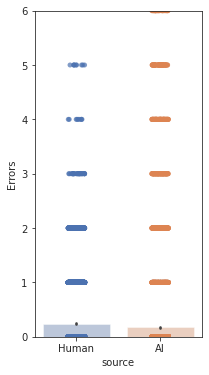

In [12]:
df2 = df[df.engine=='dv2_prolific']
sns.set({'figure.figsize': (3, 6)})
sns.set_style('ticks')
sns.barplot(x='source', y='correctness', data=df, alpha=0.4)
sns.stripplot(x='source', y='correctness', data=df, alpha=0.7, jitter=0.1, size=5, zorder=1)
plt.ylabel('Errors')
plt.ylim(0, 6 )
pg.ttest(df2[df2.source=='AI'].correctness, df2[df2.source=='Human'].correctness, paired=False)

/tmp/ipykernel_236364/2193031363.py:14: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('png')
/tmp/ipykernel_236364/2193031363.py:47: RuntimeWarning: invalid value encountered in double_scalars
  'd_prime': float(stats.norm.ppf(hits['id'].values[i]) - stats.norm.ppf(false['id'].values[i]))})


<AxesSubplot:xlabel='engine', ylabel='d_prime'>

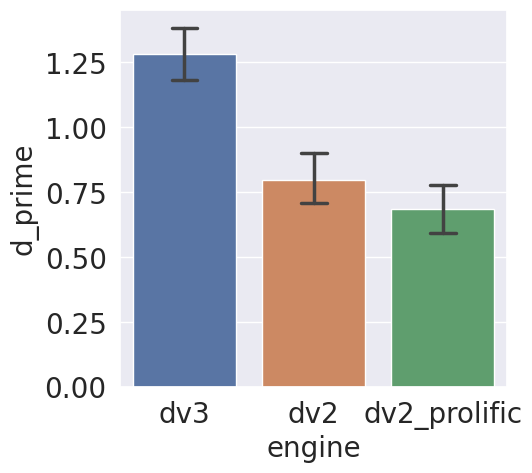

<AxesSubplot:>

(-3.0, 3.0)

Text(0.5, 1.0, 'Agreement (Yes/No)')

           n         r         CI95%     p-val   BF10     power
pearson  195 -0.063062  [-0.2, 0.08]  0.381124  0.131  0.141578
                            OLS Regression Results                            
Dep. Variable:                 agree1   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.7706
Date:                Fri, 10 Mar 2023   Prob (F-statistic):              0.381
Time:                        17:31:26   Log-Likelihood:                 147.67
No. Observations:                 195   AIC:                            -291.3
Df Residuals:                     193   BIC:                            -284.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---

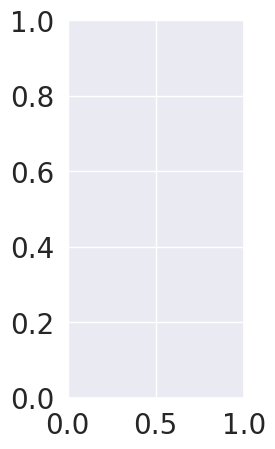

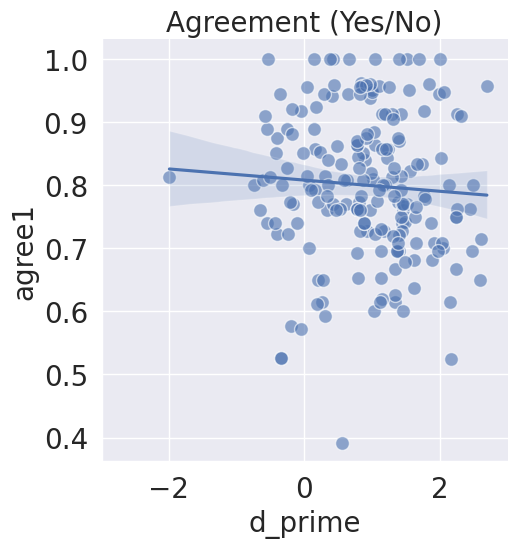

<AxesSubplot:>

(-3.0, 3.0)

Text(0.5, 1.0, 'Agreement (Justification)')

           n         r          CI95%     p-val   BF10    power
pearson  195 -0.091696  [-0.23, 0.05]  0.202338  0.201  0.24783
                            OLS Regression Results                            
Dep. Variable:                 agree2   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.637
Date:                Fri, 10 Mar 2023   Prob (F-statistic):              0.202
Time:                        17:31:26   Log-Likelihood:                 112.59
No. Observations:                 195   AIC:                            -221.2
Df Residuals:                     193   BIC:                            -214.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---

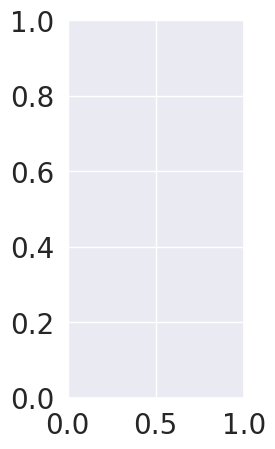

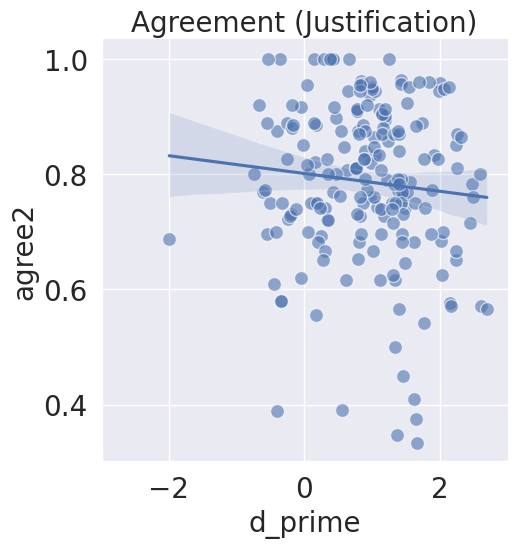

In [ ]:
import scipy.stats as stats

sns.set(
    rc={'figure.figsize':(23,6), "figure.dpi": 100, 'legend.fontsize': 20,
        'axes.labelsize': 20, 'axes.titlesize': 20,
        'xtick.labelsize': 20, 'ytick.labelsize': 20, 'font.family': 'sans-serif',
        'font.sans-serif': 'Arial', 'text.usetex': False})
# set S2 as default style
# sns.set_palette('Set2')
sns.set_palette('deep')
sns.set_style("ticks")

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png')
plt.rcParams['ytick.major.width'] = 2.5
plt.rcParams['xtick.major.width'] = 2.5

false = pd.DataFrame()
hits = pd.DataFrame()

labels = ['id', 'agree1', 'agree2']
labels = ['id']
titles = ['Agreement (Yes/No)', 'Agreement (Justification)']

false['id'] = 1 - df[(df.source == 'Human') & (df.q_id == 2)
                     ].groupby('prolific_id', as_index=False).mean().correct
false['engine'] = df[(df.source == 'Human') & (df.q_id == 2)].groupby(['prolific_id', 'engine'], as_index=False).mean().engine
hits['id'] = df[(df.source == 'AI') & (df.q_id == 2)].groupby(
    'prolific_id', as_index=False).mean().correct
hits['engine'] = df[(df.source == 'AI') & (df.q_id == 2)].groupby(['prolific_id', 'engine'],as_index=False).mean().engine

false['agree1'] = 1 - df[(df.source == 'Human') & (df.q_id == 0)
                         ].groupby('prolific_id', as_index=False).mean().agree1

hits['agree1'] = df[(df.source == 'AI') & (df.q_id == 0)].groupby(
    'prolific_id', as_index=False).mean().agree1
false['agree2'] = 1 - df[(df.source == 'Human') & (df.q_id == 1)
                         ].groupby('prolific_id', as_index=False).mean().agree2
hits['agree2'] = df[(df.source == 'AI') & (df.q_id == 1)].groupby(
    'prolific_id', as_index=False).mean().agree2

d = []
for i in range(false['id'].shape[0]):
    d.append({'agree1': hits['agree1'].values[i],
              'agree2': hits['agree2'].values[i],
              'engine': hits['engine'].values[i],
              'd_prime': float(stats.norm.ppf(hits['id'].values[i]) - stats.norm.ppf(false['id'].values[i]))})

d = pd.DataFrame(d)  # plt.subplot(1, 4, 1)
d = d[~d.isin([np.nan, np.inf, -np.inf]).any(1)]

sns.set({'figure.figsize': (5,5), "figure.dpi": 100, 'legend.fontsize': 20,})
sns.barplot(x='engine', y='d_prime', data=d, ci=68, capsize=0.2, errwidth=2.5, edgecolor='white')
plt.show()

count = 0
d['d_prime'] = d['d_prime'].astype(float)
d['agree1'] = d['agree1'].astype(float)
for agree in ('agree1', 'agree2'):
    count += 1
    # plt.clear()
    plt.subplot(1, 2, count)
    sns.lmplot(x='d_prime', y=agree, data=d, scatter_kws={
               'alpha': 0.6, 's': 100, 'edgecolor': 'white'})
# snspine(offset=10, trim=True)
    plt.gca().spines['left'].set_linewidth(2.5)
    plt.gca().spines['bottom'].set_linewidth(2.5)
    plt.xlim([-3, 3])
    plt.title(titles[count-1])
    print(pg.corr(d['d_prime'], d[agree]))
    print(sm.formula.ols(f'{agree} ~ d_prime', data=d).fit().summary())
    plt.show()


,prolific_id,engine,dataset_id,id_first,item_idx,item_id,q_id,rt,correct,agree1,agree2,agree_both,disagree_both
0,542460e3fdf99b691e6ac927,dv3,56.0,0.622222,22.0,2641.022222,1.0,37601.600000,0.733333,0.755556,0.866667,0.755556,0.133333
1,5483702ffdf99b24c654b810,dv2,28.0,0.543478,22.5,1327.500000,1.0,83746.630435,0.391304,0.760870,0.630435,0.608696,0.217391
2,54b9acd9fdf99b34ce2578f9,dv2,20.0,0.478261,22.5,953.500000,1.0,35265.217391,0.652174,0.782609,0.826087,0.760870,0.152174
3,559cdad9fdf99b66f54b7794,dv3,54.0,0.533333,22.0,2549.466667,1.0,79184.800000,0.577778,0.888889,0.888889,0.844444,0.066667
4,55f821f832af740005172118,dv3,21.0,0.555556,22.0,1002.533333,1.0,27315.533333,0.733333,0.888889,0.888889,0.888889,0.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,63e52bcf0e8f21007fa8308b,dv3,41.0,0.577778,22.0,1947.000000,1.0,22853.711111,0.800000,0.777778,0.822222,0.711111,0.111111
188,63e55ab8223fe6129765e841,dv3,34.0,0.333333,22.0,1618.200000,1.0,44027.644444,0.644444,0.866667,0.822222,0.755556,0.066667
189,63ea44a0adefd2af8e13015c,dv3,36.0,0.555556,22.0,1713.466667,1.0,33814.466667,0.755556,0.866667,0.866667,0.777778,0.044444
190,63ea61d8106e3e2dc14c4cc7,dv3,9.0,0.444444,22.0,441.266667,1.0,31613.622222,0.866667,0.866667,0.844444,0.822222,0.111111


In [86]:
sns.set({'figure.figsize':(6,6), "figure.dpi": 100, 'legend.fontsize': 20,})
df['justif_len'] = df.a1.str.len()
dff = df[(df.q_id == 2) & (df.engine=='dv2')]
dff.loc[dff.answer=='AI', 'a'] = 1
dff.loc[dff.answer=='Human', 'a'] = 0


print(sm.Logit.from_formula('a ~ justif_len*correctness*sim_score', data=dff).fit().summary())
#sns.lmplot(x='justif_len', y='a', data=dff, logistic=True)
#plt.ylabel('ID Answer (AI=1, Human=0)')
#plt.xlabel('justification length')
#plt.annotate('***', xy=(0, 0), fontsize=20)

Optimization terminated successfully.
         Current function value: 0.625822
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      a   No. Observations:                 3542
Model:                          Logit   Df Residuals:                     3534
Method:                           MLE   Df Model:                            7
Date:                Thu, 20 Apr 2023   Pseudo R-squ.:                 0.06500
Time:                        18:28:54   Log-Likelihood:                -2216.7
converged:                       True   LL-Null:                       -2370.8
Covariance Type:            nonrobust   LLR p-value:                 1.075e-62
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           -0.9538      0.069    -13.88

/media/getz/ae930ef3-4ac4-4a95-a76a-47e9ab0a2b27/CodeProjects/Python/CognitiveReflection/venv/lib/python3.8/site-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/media/getz/ae930ef3-4ac4-4a95-a76a-47e9ab0a2b27/CodeProjects/Python/CognitiveReflection/venv/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


<AxesSubplot:ylabel='d_prime'>

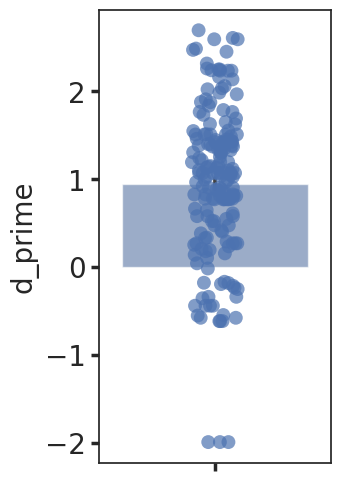

In [ ]:
sns.set({'figure.figsize':(3, 6), 'figure.dpi': 100, 'font.size': 13})
sns.set_style('ticks')
sns.barplot(y='d_prime', data=d, ci=68, alpha=.6)
sns.stripplot(y='d_prime', data=d, size=10, edgecolor='white', alpha=.7)

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

array(['Human', 'AI', 'Prolific', 'Not Prolific'], dtype=object)

<AxesSubplot:ylabel='answer'>

<AxesSubplot:ylabel='answer'>

<AxesSubplot:ylabel='answer'>

(-0.1, 1.1)

Text(0.5, 1.0, 'Proportion of choice')

([<matplotlib.axis.XTick at 0x7f40f93cb700>,
 [Text(0, 0, ''), Text(1, 0, '')])

Text(0.5, 0, '')

([], [])

([], [])

Text(0.5, 0, 'choice')

([], [])

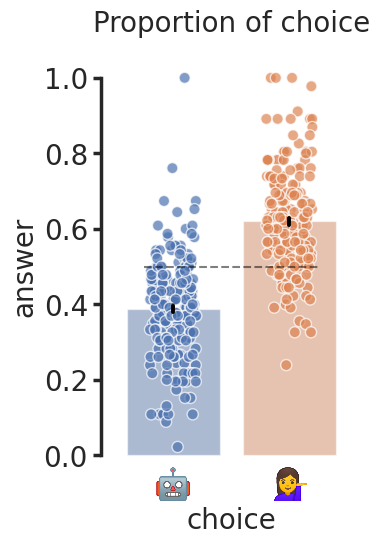

In [ ]:

sns.set({'figure.figsize':(3, 6), 'figure.dpi': 100, 'font.size': 13})
sns.set_style('ticks')
sns.color_palette('deep')
# -------------------------------------------------------------------------------
# Plot: Consistency agreement
# -------------------------------------------------------------------------------
# avg = df[df.q_id.isin([0])].groupby(['prolific_id', 'source'], as_index=False).mean()
df[(df.q_id==2)].answer.unique()
df2 = df[df.q_id==2].copy()
df2.loc[df2.answer == 'Not Prolific', 'answer'] = 'AI'
df2.loc[df2.answer == 'Prolific', 'answer'] = 'Human'

x = df2[df2.q_id==2].groupby('prolific_id').answer.value_counts(normalize=True).keys().tolist()
x = [item[1] for item in x]
y = df[df.q_id==2].groupby('prolific_id').answer.value_counts(normalize=True)
plt.plot([-0.25, 1.25], [0.5, 0.5], '--', color='black', alpha=0.5)

# raincloud(x=x, y=y, markersize=12, df=None, order=['AI', 'Human'])
sns.barplot(x=x, y=y, ci=68, alpha=.5, zorder=0)
sns.stripplot(x=x, y=y,  alpha=0.7, jitter=0.2, size=8, linewidth=1, edgecolor='white', zorder=1)
sns.pointplot(x=x, y=y, ci=68, color='black', scale=0, errorbar='se', join=False, zorder=2)
plt.ylim(-.1, 1.1)
plt.title('Proportion of choice')
plt.xticks(range(2), ('', ''))
plt.xlabel('')
plt.xticks([])
sns.despine(offset=10, trim=True, bottom=True);
plt.gca().spines['left'].set_linewidth(2.5)
plt.xticks([])
plt.xlabel('choice')
plt.xticks([])
for i, c in enumerate(avg.source.unique()):
    offset_image(i, c, plt.gca(), size=0.2)



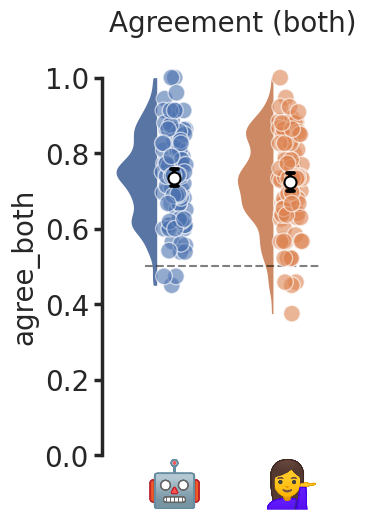

In [ ]:
sns.set_style('ticks')
sns.color_palette('deep')
# -------------------------------------------------------------------------------
# Plot: Consistency agreement
# -------------------------------------------------------------------------------
avg = df[df.q_id.isin([0])].groupby(['prolific_id', 'source'], as_index=False).mean()
plt.plot([-0.25, 1.25], [0.5, 0.5], '--', color='black', alpha=0.5)
raincloud(x='source', y='agree_both', markersize=12, df=avg, order=['AI', 'Human'])
# sns.barplot(x='source', y='agree2', data=avg, errorbar='se')
# sns.stripplot(x='source', y='agree2', data=avg, color='black', alpha=0.5, jitter=0.1, size=15)
plt.ylim(-.1, 1.1)
plt.title('Agreement (both)')
plt.xticks(range(2), ('', ''))
plt.xlabel('')
plt.xticks([])
for i, c in enumerate(avg.source.unique()):
    offset_image(i, c, plt.gca(), size=0.3)
sns.despine(offset=10, trim=True, bottom=True);
plt.gca().spines['left'].set_linewidth(2.5)
plt.xticks([])
plt.xlabel('')
plt.xticks([])
for i, c in enumerate(avg.source.unique()):
    offset_image(i, c, plt.gca(), size=0.3)



([], [])

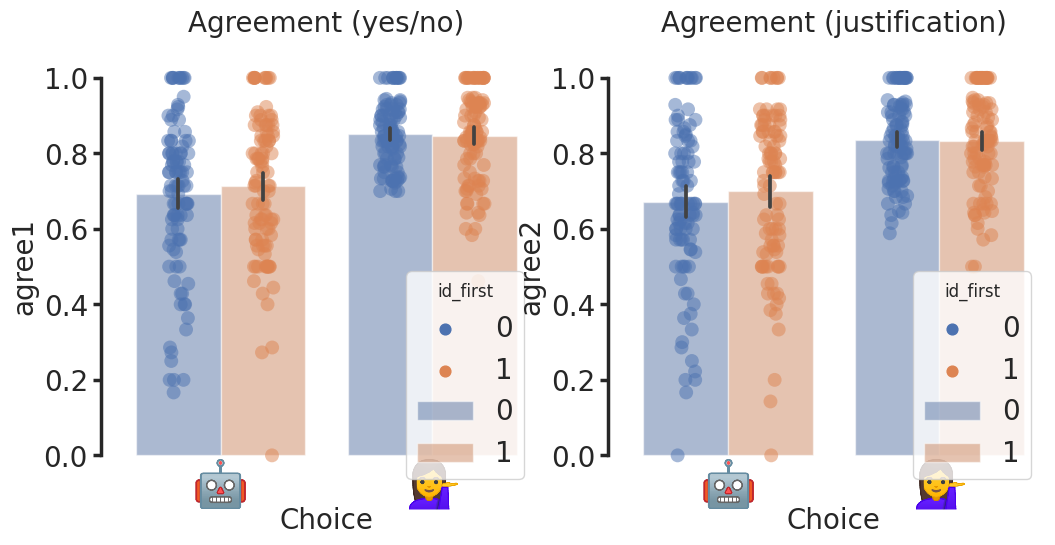

In [ ]:
sns.set({'figure.figsize':(12, 6), 'figure.dpi': 100, 'font.size': 13})
sns.set_style('ticks')
sns.color_palette('deep')
# -------------------------------------------------------------------------------
# Plot:  agreement according to id first
# -------------------------------------------------------------------------------
plt.subplot(1, 2, 1)
avg = df[df.q_id.isin([0])].groupby(['prolific_id', 'turing', 'id_first'], as_index=False).mean()
# plt.plot([-0.25, 1.25], [0.5, 0.5], '--', color='black', alpha=0.5)
# raincloud(x='id_first', y='agree1', markersize=12, df=avg, order=['AI', 'Human'])
sns.barplot(x='turing', y='agree1', data=avg,  hue='id_first', dodge=True, alpha=.5, zorder=0)
g = sns.stripplot(x='turing', y='agree1', data=avg, alpha=0.5, jitter=0.1,
    size=10, hue='id_first', dodge=True, edgecolor='white', zorder=1)
plt.ylim(-.1, 1.1)
plt.title('Agreement (yes/no)')
plt.xlabel('Choice')
for i, c in enumerate(avg.turing.unique()):
    offset_image(i, c, plt.gca(), size=0.3)
sns.despine(offset=10, trim=True, bottom=True);
plt.gca().spines['left'].set_linewidth(2.5)
plt.xticks([])
plt.xticks([])

# -------------------------------------------------------------------------------
# Plot:  agreement justification according to id first
# -------------------------------------------------------------------------------
plt.subplot(1, 2, 2)
avg = df[df.q_id.isin([1])].groupby(['prolific_id', 'turing', 'id_first'], as_index=False).mean()
# plt.plot([-0.25, 1.25], [0.5, 0.5], '--', color='black', alpha=0.5)
# raincloud(x='id_first', y='agree1', markersize=12, df=avg, order=['AI', 'Human'])
sns.barplot(x='turing', y='agree2', data=avg,  hue='id_first', dodge=True, alpha=.5, zorder=0)
g = sns.stripplot(x='turing', y='agree2', data=avg, alpha=0.5, jitter=0.1,
    size=10, hue='id_first', dodge=True, edgecolor='white', zorder=1)
plt.ylim(-.1, 1.1)
plt.title('Agreement (justification)')
for i, c in enumerate(avg.turing.unique()):
    offset_image(i, c, plt.gca(), size=0.3)
sns.despine(offset=10, trim=True, bottom=True);
plt.gca().spines['left'].set_linewidth(2.5)
plt.xticks([])
plt.xlabel('Choice')
plt.xticks([])




<AxesSubplot:xlabel='source', ylabel='dataset_id'>

<AxesSubplot:xlabel='source', ylabel='dataset_id'>

Text(0, 0.5, 'N trials')

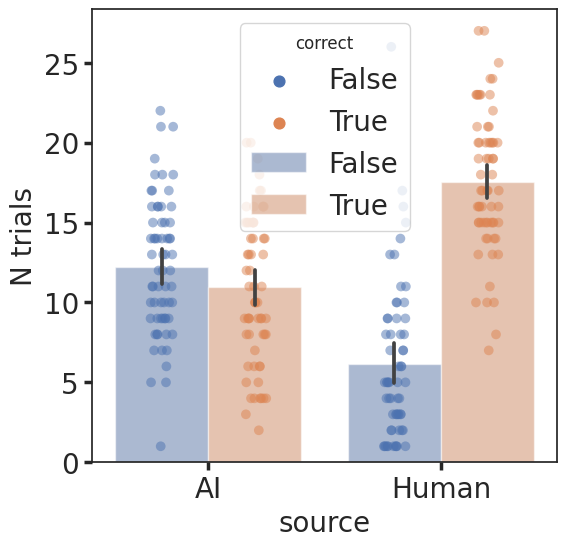

In [ ]:
df2 = df[(df.engine=='dv2_prolific') & (df.q_id==2)].groupby(['prolific_id', 'source', 'correct'], as_index=False).count()
sns.set({'figure.figsize':(6, 6), 'figure.dpi': 100, 'font.size': 13})
sns.set_style('ticks')
sns.barplot(x='source', y='dataset_id', data=df2, hue='correct', dodge=True, alpha=.5, zorder=0)
sns.stripplot(x='source', y='dataset_id', data=df2, alpha=0.5, jitter=0.1, size=7, hue='correct', dodge=True, zorder=1)
plt.ylabel('N trials')

Size of dv2_prolific dataset:  90.66666666666667


<AxesSubplot:>

<AxesSubplot:xlabel='source', ylabel='agree1'>

<AxesSubplot:xlabel='source', ylabel='agree1'>

(-0.1, 1.1)

Text(0.5, 1.0, 'Agreement 1 (Yes/No)')

([<matplotlib.axis.XTick at 0x7f8175cea190>,
 [Text(0, 0, ''), Text(1, 0, '')])

Text(0.5, 0, '')

([], [])

Text(0.5, 0, 'Source')

ANOVA: VAR=agree1, ENGINE=dv2


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,source,0.001905,1,59,0.001905,0.032653,0.857220,0.857220,0.000144,1.0
1,correct,0.080417,1,59,0.080417,2.428517,0.124494,0.124494,0.006025,1.0
2,source * correct,1.408535,1,59,1.408535,17.553935,0.000095,0.000095,0.095985,1.0


<AxesSubplot:>

<AxesSubplot:xlabel='source', ylabel='agree2'>

<AxesSubplot:xlabel='source', ylabel='agree2'>

(-0.1, 1.1)

Text(0.5, 1.0, 'Agreement 2 (Justification)')

([<matplotlib.axis.XTick at 0x7f8175afe9a0>,
 [Text(0, 0, ''), Text(1, 0, '')])

Text(0.5, 0, '')

([], [])

Text(0.5, 0, 'Source')

ANOVA: VAR=agree2, ENGINE=dv2
             Source        SS  ddof1  ddof2        MS          F  \
0            source  0.090813      1     59  0.090813   1.423841   
1           correct  0.014452      1     59  0.014452   0.356215   
2  source * correct  3.983441      1     59  3.983441  41.790900   

          p-unc     p-GG-corr       ng2  eps  
0  2.375486e-01  2.375486e-01  0.005005  1.0  
1  5.528991e-01  5.528991e-01  0.000800  1.0  
2  2.165235e-08  2.165235e-08  0.180756  1.0  


<AxesSubplot:>

NameError: name 'question' is not defined

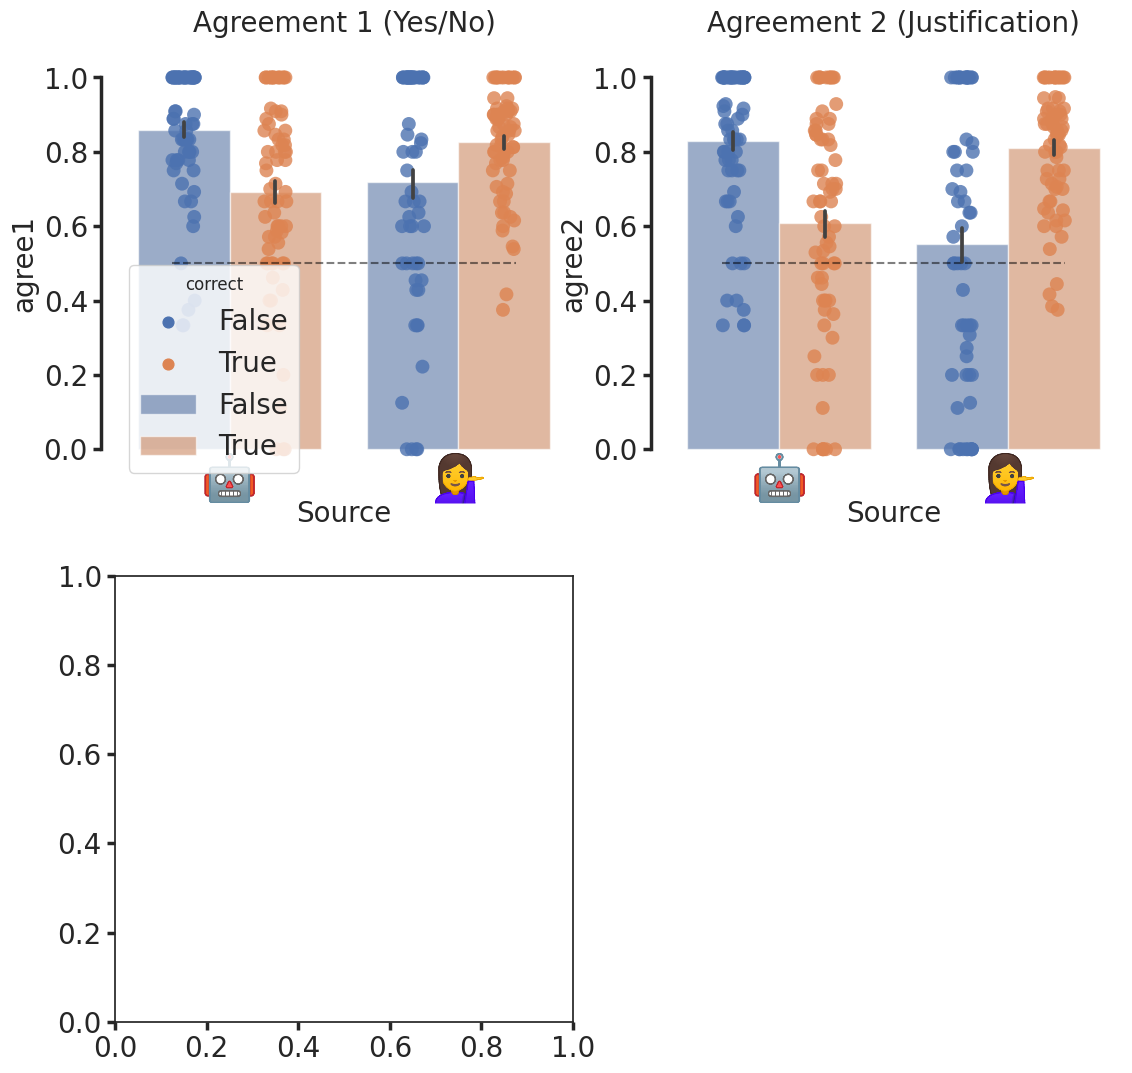

In [13]:
sns.set(
    rc={'figure.figsize':(13,13), "figure.dpi": 100, 'legend.fontsize': 20, 'axes.labelsize': 20, 'axes.titlesize': 20,
      'xtick.labelsize': 20, 'ytick.labelsize': 20, 'font.family': 'sans-serif',
      'font.sans-serif': 'Arial', 'text.usetex': False})
# set S2 as default style
plt.rcParams['ytick.major.width'] = 2.5
plt.rcParams['xtick.major.width'] = 2.5


# sns.set_palette('Set2')
sns.set_palette('deep')
sns.set_style("ticks")

# -------------------------------------------------------------------------------
# Plot:  agreement 1 per correct and source + anova
# -------------------------------------------------------------------------------
engine = 'dv2_prolific'
avg = df[(df.engine==engine) & (df.q_id == 2) & (df.cond!='non_moral')].groupby(['prolific_id', 'source', 'correct'], as_index=False).mean()
print(f'Size of {engine} dataset: ', avg.shape[0]/3)

plt.subplot(2, 2, 1)
plt.plot([-0.25, 1.25], [0.5, 0.5], '--', color='black', alpha=0.5)
# raincloud(x='source', y='agree_both', markersize=12, df=avg, order=['AI', 'Human'])
sns.barplot(x='source', y='agree1', data=avg, ci=68, alpha=0.6, hue='correct', zorder=0, dodge=True)
sns.stripplot(x='source', y='agree1', data=avg, alpha=0.8, jitter=0.1, size=10, dodge=True, hue='correct', zorder=1)
plt.ylim(-.1, 1.1)
plt.title('Agreement 1 (Yes/No)')
plt.xticks(range(2), ('', ''))
plt.xlabel('')
plt.xticks([])
for i, c in enumerate(avg.source.unique()):
    offset_image(i, c, plt.gca(), size=0.3)
sns.despine(offset=10, trim=True, bottom=True);
plt.gca().spines['left'].set_linewidth(2.5)
plt.gca().spines['bottom'].set_linewidth(2.5)

plt.xlabel('Source')
# plt.legend([], [], frameon=False)
print('ANOVA: VAR=agree1, ENGINE=dv2')
pg.rm_anova(data=avg, dv='agree1', within=['source', 'correct'], subject='prolific_id', detailed=True)


# -------------------------------------------------------------------------------
# Plot:  agreement 2 per correct and source + anova
# -------------------------------------------------------------------------------
plt.subplot(2, 2, 2)
plt.plot([-0.25, 1.25], [0.5, 0.5], '--', color='black', alpha=0.5)
# raincloud(x='source', y='agree_both', markersize=12, df=avg, order=['AI', 'Human'])
sns.barplot(x='source', y='agree2', data=avg, ci=68, alpha=0.6, hue='correct', zorder=0)
sns.stripplot(x='source', y='agree2', data=avg, alpha=0.8, jitter=0.1, size=10, dodge=True, hue='correct', zorder=1, edgecolor='white')
plt.ylim(-.1, 1.1)
plt.title('Agreement 2 (Justification)')
plt.xticks(range(2), ('', ''))
plt.xlabel('')
plt.xticks([])
for i, c in enumerate(avg.source.unique()):
    offset_image(i, c, plt.gca(), size=0.3)
sns.despine(offset=10, trim=True, bottom=True);
plt.gca().spines['left'].set_linewidth(2.5)
plt.gca().spines['bottom'].set_linewidth(2.5)
plt.legend([], [], frameon=False)
plt.xlabel('Source')
print('ANOVA: VAR=agree2, ENGINE=dv2')
print(pg.rm_anova(data=avg, dv='agree2', within=['source', 'correct'], subject='prolific_id', detailed=True))

# -------------------------------------------------------------------------------
# Plot:  agreement 2 per correct and source + anova
# -------------------------------------------------------------------------------
plt.subplot(2, 2, 3)
engine = 'dv2_prolific'
avg = df[(df.engine==engine) & (df.prolific_id.isin(question.prolific_id[question.answer=='AI'])) & (df.q_id == 2)].groupby(['prolific_id', 'source', 'correct'], as_index=False).mean()
print('Size of dataset: ', avg.size)
plt.plot([-0.25, 1.25], [0.5, 0.5], '--', color='black', alpha=0.5)
# raincloud(x='source', y='agree_both', markersize=12, df=avg, order=['AI', 'Human'])
sns.barplot(x='source', y='agree1', data=avg, ci=68, alpha=0.6, hue='correct', zorder=0)
sns.stripplot(x='source', y='agree1', data=avg, alpha=0.8, jitter=0.1, size=10, dodge=True, hue='correct', zorder=1, edgecolor='white')
plt.ylim(-.1, 1.1)
plt.title('Agreement 1 (Yes/No)')
plt.xticks(range(2), ('', ''))
plt.xlabel('')
plt.xticks([])
for i, c in enumerate(avg.source.unique()):
    offset_image(i, c, plt.gca(), size=0.3)
sns.despine(offset=10, trim=True, bottom=True);
plt.gca().spines['left'].set_linewidth(2.5)
plt.gca().spines['bottom'].set_linewidth(2.5)
plt.xlabel('Source')
plt.legend([], [], frameon=False)
print('ANOVA: \n VAR=agreement 1 ; ENGINE=dv2_prolific')
pg.rm_anova(data=avg, dv='agree1', within=['source', 'correct'], subject='prolific_id', detailed=True)



plt.subplot(2, 2, 4)
# -------------------------------------------------------------------------------
# Plot:  agreement 2 per correct and source + anova
# -------------------------------------------------------------------------------
plt.plot([-0.25, 1.25], [0.5, 0.5], '--', color='black', alpha=0.5)
# raincloud(x='source', y='agree_both', markersize=12, df=avg, order=['AI', 'Human'])
sns.barplot(x='source', y='agree2', data=avg, ci=68, alpha=0.6, hue='correct', zorder=0)
sns.stripplot(x='source', y='agree2', data=avg, alpha=0.8, jitter=0.1, size=10, dodge=True, hue='correct', zorder=1, edgecolor='white')
plt.ylim(-.1, 1.1)
plt.title('Agreement 2 (Justification)')
plt.xticks(range(2), ('', ''))
plt.xlabel('')
plt.xticks([])
for i, c in enumerate(avg.source.unique()):
    offset_image(i, c, plt.gca(), size=0.3)
sns.despine(offset=10, trim=True, bottom=True);
plt.gca().spines['left'].set_linewidth(2.5)
plt.gca().spines['bottom'].set_linewidth(2.5)

plt.xlabel('Source')
plt.legend([], [], frameon=False)
print('ANOVA: \n VAR=agreement 2 ; ENGINE=dv2_prolific')
print(pg.rm_anova(data=avg, dv='agree2', within=['source', 'correct'], subject='prolific_id', detailed=True))




        Source        SS  DF1  DF2        MS           F         p-unc  \
0       engine  1.107804    1  169  1.107804   26.123587  8.592556e-07   
1       source  3.269298    1  169  3.269298  126.771792  2.682744e-22   
2  Interaction  0.003793    1  169  0.003793    0.147089  7.018154e-01   

        np2  eps  
0  0.133882  NaN  
1  0.428614  1.0  
2  0.000870  NaN  
        Source        SS  DF1  DF2        MS         F     p-unc       np2  \
0       engine  0.030255    1  169  0.030255  2.516109  0.114558  0.014670   
1       source  0.020445    1  169  0.020445  2.096785  0.149462  0.012255   
2  Interaction  0.001369    1  169  0.001369  0.140378  0.708376  0.000830   

   eps  
0  NaN  
1  1.0  
2  NaN  


/home/getz/PycharmProjects/CognitiveReflection/venv/lib/python3.8/site-packages/pingouin/parametric.py:747: RuntimeWarning: invalid value encountered in double_scalars
  f_a = ms_a / ms_as
/home/getz/PycharmProjects/CognitiveReflection/venv/lib/python3.8/site-packages/pingouin/parametric.py:748: RuntimeWarning: invalid value encountered in double_scalars
  f_b = ms_b / ms_bs
/home/getz/PycharmProjects/CognitiveReflection/venv/lib/python3.8/site-packages/pingouin/parametric.py:749: RuntimeWarning: invalid value encountered in double_scalars
  f_ab = ms_ab / ms_abs
/home/getz/PycharmProjects/CognitiveReflection/venv/lib/python3.8/site-packages/pingouin/parametric.py:764: RuntimeWarning: invalid value encountered in double_scalars
  ef_a = ss_a / (ss_a + ss_s + ss_as + ss_bs + ss_abs)
/home/getz/PycharmProjects/CognitiveReflection/venv/lib/python3.8/site-packages/pingouin/parametric.py:765: RuntimeWarning: invalid value encountered in double_scalars
  ef_b = ss_b / (ss_b + ss_s + ss_as + 

            Source   SS  ddof1  ddof2   MS   F  p-unc  p-GG-corr  ng2  eps
0           source  0.0     -1      1 -0.0 NaN    NaN        NaN  NaN  1.0
1           engine  0.0     -1      1 -0.0 NaN    NaN        NaN  NaN  1.0
2  source * engine  0.0      1     -1  0.0 NaN    NaN        NaN  NaN  NaN


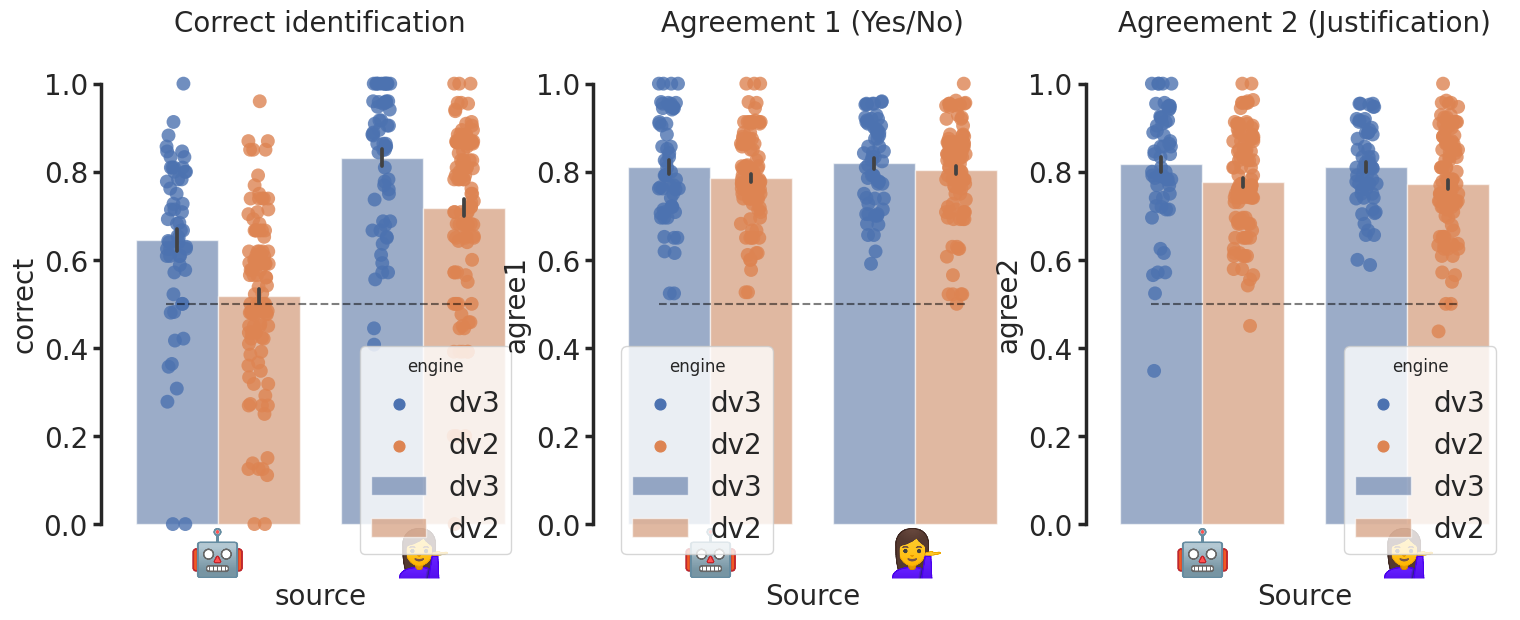

In [ ]:
sns.set(
    rc={'figure.figsize':(18,7), "figure.dpi": 100, 'legend.fontsize': 20, 'axes.labelsize': 20, 'axes.titlesize': 20,
      'xtick.labelsize': 20, 'ytick.labelsize': 20, 'font.family': 'sans-serif',
      'font.sans-serif': 'Arial', 'text.usetex': False})
# set S2 as default style
plt.rcParams['ytick.major.width'] = 2.5
plt.rcParams['xtick.major.width'] = 2.5


# sns.set_palette('Set2')
sns.set_palette('deep')
sns.set_style("ticks")

# -------------------------------------------------------------------------------
# Plot:  agreement 1 per correct and source + anova
# -------------------------------------------------------------------------------

avg = df.groupby(['prolific_id', 'source', 'engine'], as_index=False).mean()

plt.subplot(1, 3, 1)
plt.plot([-0.25, 1.25], [0.5, 0.5], '--', color='black', alpha=0.5)
# raincloud(x='source', y='agree_both', markersize=12, df=avg, order=['AI', 'Human'])
sns.barplot(x='source', y='correct', data=avg, ci=68, alpha=0.6, hue='engine', zorder=0, dodge=True)
sns.stripplot(x='source', y='correct', data=avg, alpha=0.8, jitter=0.1, size=10, dodge=True, hue='engine', zorder=1)
plt.ylim(-.1, 1.1)
plt.title('Correct identification')
plt.xticks(range(2), ('', ''))
plt.xlabel('source')
plt.xticks([])
for i, c in enumerate(avg.source.unique()):
    offset_image(i, c, plt.gca(), size=0.3)
sns.despine(offset=10, trim=True, bottom=True);
plt.gca().spines['left'].set_linewidth(2.5)
plt.gca().spines['bottom'].set_linewidth(2.5)
# plt.legend([], [], frameon=False)
print(pg.mixed_anova(data=avg, dv='correct', within='source', between='engine', subject='prolific_id'))



# -------------------------------------------------------------------------------
# Plot:  agreement 1 per correct and source + anova
# -------------------------------------------------------------------------------

avg = df.groupby(['prolific_id', 'source', 'engine'], as_index=False).mean()

plt.subplot(1, 3, 2)
plt.plot([-0.25, 1.25], [0.5, 0.5], '--', color='black', alpha=0.5)
# raincloud(x='source', y='agree_both', markersize=12, df=avg, order=['AI', 'Human'])
sns.barplot(x='source', y='agree1', data=avg, ci=68, alpha=0.6, hue='engine', zorder=0, dodge=True)
sns.stripplot(x='source', y='agree1', data=avg, alpha=0.8, jitter=0.1, size=10, dodge=True, hue='engine', zorder=1)
plt.ylim(-.1, 1.1)
plt.title('Agreement 1 (Yes/No)')
plt.xticks(range(2), ('', ''))
plt.xlabel('')

plt.xlabel('Source')
plt.xticks([])
for i, c in enumerate(avg.source.unique()):
    offset_image(i, c, plt.gca(), size=0.3)
sns.despine(offset=10, trim=True, bottom=True);
plt.gca().spines['left'].set_linewidth(2.5)
plt.gca().spines['bottom'].set_linewidth(2.5)
# plt.legend([], [], frameon=False)
print(pg.mixed_anova(data=avg, dv='agree1', within='source', between='engine', subject='prolific_id'))


# -------------------------------------------------------------------------------
# Plot:  agreement 2 per correct and source + anova
# -------------------------------------------------------------------------------
plt.subplot(1, 3, 3)
plt.plot([-0.25, 1.25], [0.5, 0.5], '--', color='black', alpha=0.5)
# raincloud(x='source', y='agree_both', markersize=12, df=avg, order=['AI', 'Human'])
sns.barplot(x='source', y='agree2', data=avg, ci=68, alpha=0.6, hue='engine', zorder=0)
sns.stripplot(x='source', y='agree2', data=avg, alpha=0.8, jitter=0.1, size=10, dodge=True, hue='engine', zorder=1, edgecolor='white')
plt.ylim(-.1, 1.1)
plt.title('Agreement 2 (Justification)')
plt.xticks(range(2), ('', ''))
plt.xlabel('')
plt.xticks([])

plt.xlabel('Source')
for i, c in enumerate(avg.source.unique()):
    offset_image(i, c, plt.gca(), size=0.3)
sns.despine(offset=10, trim=True, bottom=True);
plt.gca().spines['left'].set_linewidth(2.5)
plt.gca().spines['bottom'].set_linewidth(2.5)
# plt.legend([], [], frameon=False)
print(pg.rm_anova(data=avg, dv='agree2', within=['source', 'engine'], subject='prolific_id', detailed=True))




Text(0.5, 0.98, 'DV3')

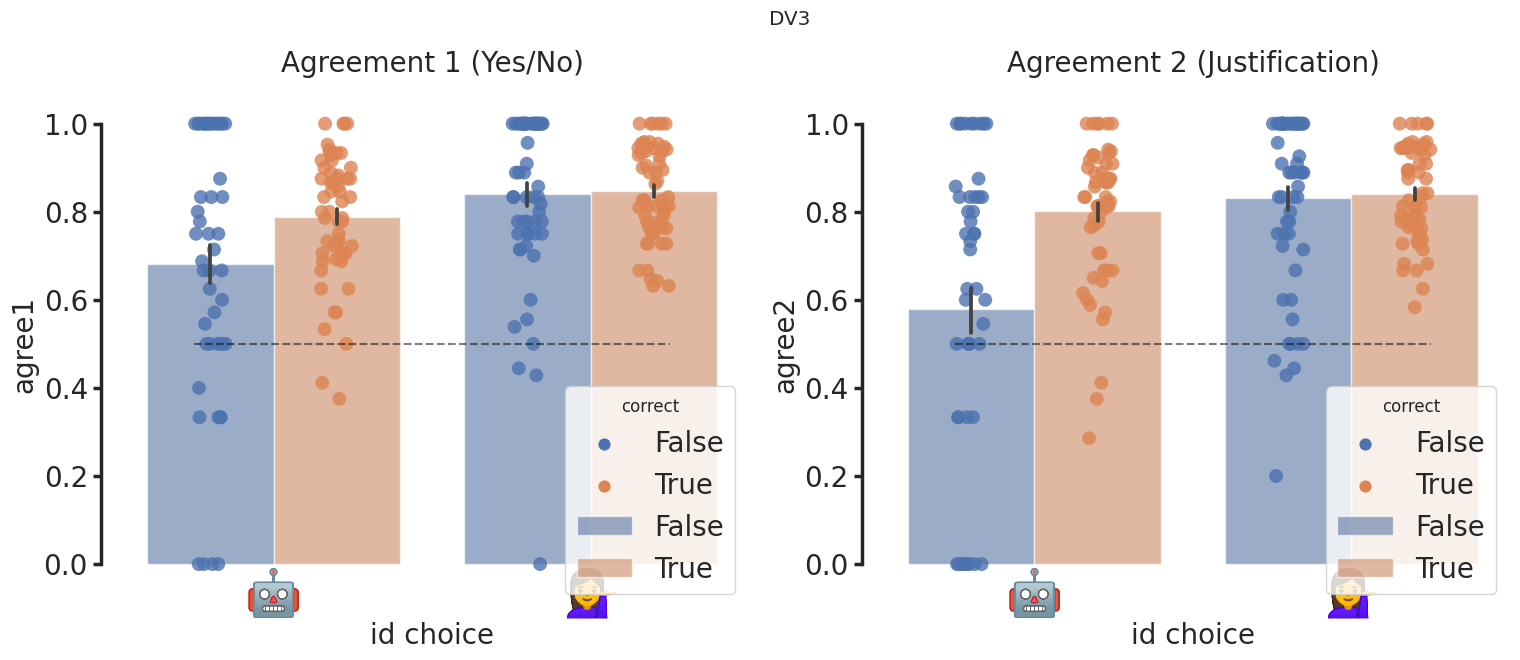

In [ ]:
sns.set(
    rc={'figure.figsize':(18,7), "figure.dpi": 100, 'legend.fontsize': 20, 'axes.labelsize': 20, 'axes.titlesize': 20,
      'xtick.labelsize': 20, 'ytick.labelsize': 20, 'font.family': 'sans-serif',
      'font.sans-serif': 'Arial', 'text.usetex': False})
# set S2 as default style
plt.rcParams['ytick.major.width'] = 2.5
plt.rcParams['xtick.major.width'] = 2.5


# sns.set_palette('Set2')
sns.set_palette('deep')
sns.set_style("ticks")

# -------------------------------------------------------------------------------
# Plot:  agreement 1 per correct and turing + anova
# -------------------------------------------------------------------------------


#plt.subplot(1, 3, 1)
#plt.plot([-0.25, 1.25], [0.5, 0.5], '--', color='black', alpha=0.5)
## raincloud(x='turing', y='agree_both', markersize=12, df=avg, order=['AI', 'Human'])
#sns.barplot(x='turing', y='correct', data=avg, ci=68, alpha=0.6, hue='correct', zorder=0, dodge=True)
#sns.stripplot(x='turing', y='correct', data=avg, alpha=0.8, jitter=0.1, size=10, dodge=True, hue='correct', zorder=1)
#plt.ylim(-.1, 1.1)
#plt.title('Correct identification')
#plt.xticks(range(2), ('', ''))
#plt.xlabel('id choice')
#plt.xticks([])
#for i, c in enumerate(avg.turing.unique()):
#    offset_image(i, c, plt.gca(), size=0.3)
#sns.despine(offset=10, trim=True, bottom=True);
#plt.gca().spines['left'].set_linewidth(2.5)
#plt.gca().spines['bottom'].set_linewidth(2.5)
# plt.legend([], [], frameon=False)
# print(pg.mixed_anova(data=avg, dv='correct', within='turing', between='correct', subject='prolific_id'))



# -------------------------------------------------------------------------------
# Plot:  agreement 1 per correct and turing + anova
# -------------------------------------------------------------------------------

avg = df[df.engine=='dv3'].groupby(['prolific_id', 'turing', 'correct'], as_index=False).mean()

plt.subplot(1, 2, 1)
plt.plot([-0.25, 1.25], [0.5, 0.5], '--', color='black', alpha=0.5)
# raincloud(x='turing', y='agree_both', markersize=12, df=avg, order=['AI', 'Human'])
sns.barplot(x='turing', y='agree1', data=avg, ci=68, alpha=0.6, hue='correct', zorder=0, dodge=True)
sns.stripplot(x='turing', y='agree1', data=avg, alpha=0.8, jitter=0.1, size=10, dodge=True, hue='correct', zorder=1)
plt.ylim(-.1, 1.1)
plt.title('Agreement 1 (Yes/No)')
plt.xticks(range(2), ('', ''))

plt.xlabel('id choice')
plt.xticks([])
for i, c in enumerate(avg.turing.unique()):
    offset_image(i, c, plt.gca(), size=0.3)
sns.despine(offset=10, trim=True, bottom=True);
plt.gca().spines['left'].set_linewidth(2.5)
plt.gca().spines['bottom'].set_linewidth(2.5)
# plt.legend([], [], frameon=False)
# print(pg.mixed_anova(data=avg, dv='agree1', within='turing', between='correct', subject='prolific_id'))


# -------------------------------------------------------------------------------
# Plot:  agreement 2 per correct and turing + anova
# -------------------------------------------------------------------------------
plt.subplot(1, 2, 2)
plt.plot([-0.25, 1.25], [0.5, 0.5], '--', color='black', alpha=0.5)
# raincloud(x='turing', y='agree_both', markersize=12, df=avg, order=['AI', 'Human'])
sns.barplot(x='turing', y='agree2', data=avg, ci=68, alpha=0.6, hue='correct', zorder=0)
sns.stripplot(x='turing', y='agree2', data=avg, alpha=0.8, jitter=0.1, size=10, dodge=True, hue='correct', zorder=1, edgecolor='white')
plt.ylim(-.1, 1.1)
plt.title('Agreement 2 (Justification)')
plt.xticks(range(2), ('', ''))
plt.xlabel('')
plt.xticks([])

plt.xlabel('id choice')
for i, c in enumerate(avg.turing.unique()):
    offset_image(i, c, plt.gca(), size=0.3)
sns.despine(offset=10, trim=True, bottom=True);
plt.gca().spines['left'].set_linewidth(2.5)
plt.gca().spines['bottom'].set_linewidth(2.5)
plt.suptitle('DV3')
# plt.legend([], [], frameon=False)
# print(pg.rm_anova(data=avg, dv='agree2', within=['turing', 'correct'], subject='prolific_id', detailed=True))




In [ ]:
df.groupby(['prolific_id', 'source', 'correct'], as_index=False).size()


,prolific_id,source,correct,size
0,542460e3fdf99b691e6ac927,AI,True,51
1,542460e3fdf99b691e6ac927,Human,False,36
2,542460e3fdf99b691e6ac927,Human,True,48
3,5483702ffdf99b24c654b810,AI,False,45
4,5483702ffdf99b24c654b810,AI,True,21
...,...,...,...,...
659,63ea61d8106e3e2dc14c4cc7,Human,True,69
660,63ea627512244090788d46ec,AI,False,12
661,63ea627512244090788d46ec,AI,True,48
662,63ea627512244090788d46ec,Human,False,3


  Source        SS   DF        MS         F     p-unc       ng2       eps
0   cond  0.340806    2  0.170403  7.192593  0.000872  0.024048  0.970557
1  Error  8.055105  340  0.023691       NaN       NaN       NaN       NaN
  Source        SS   DF        MS          F         p-unc     p-GG-corr  \
0   cond  2.099979    2  1.049989  51.383346  3.174503e-20  2.747741e-18   
1  Error  6.947706  340  0.020434        NaN           NaN           NaN   

        ng2       eps sphericity   W-spher   p-spher  
0  0.148092  0.890238      False  0.876705  0.000015  
1       NaN       NaN        NaN       NaN       NaN  


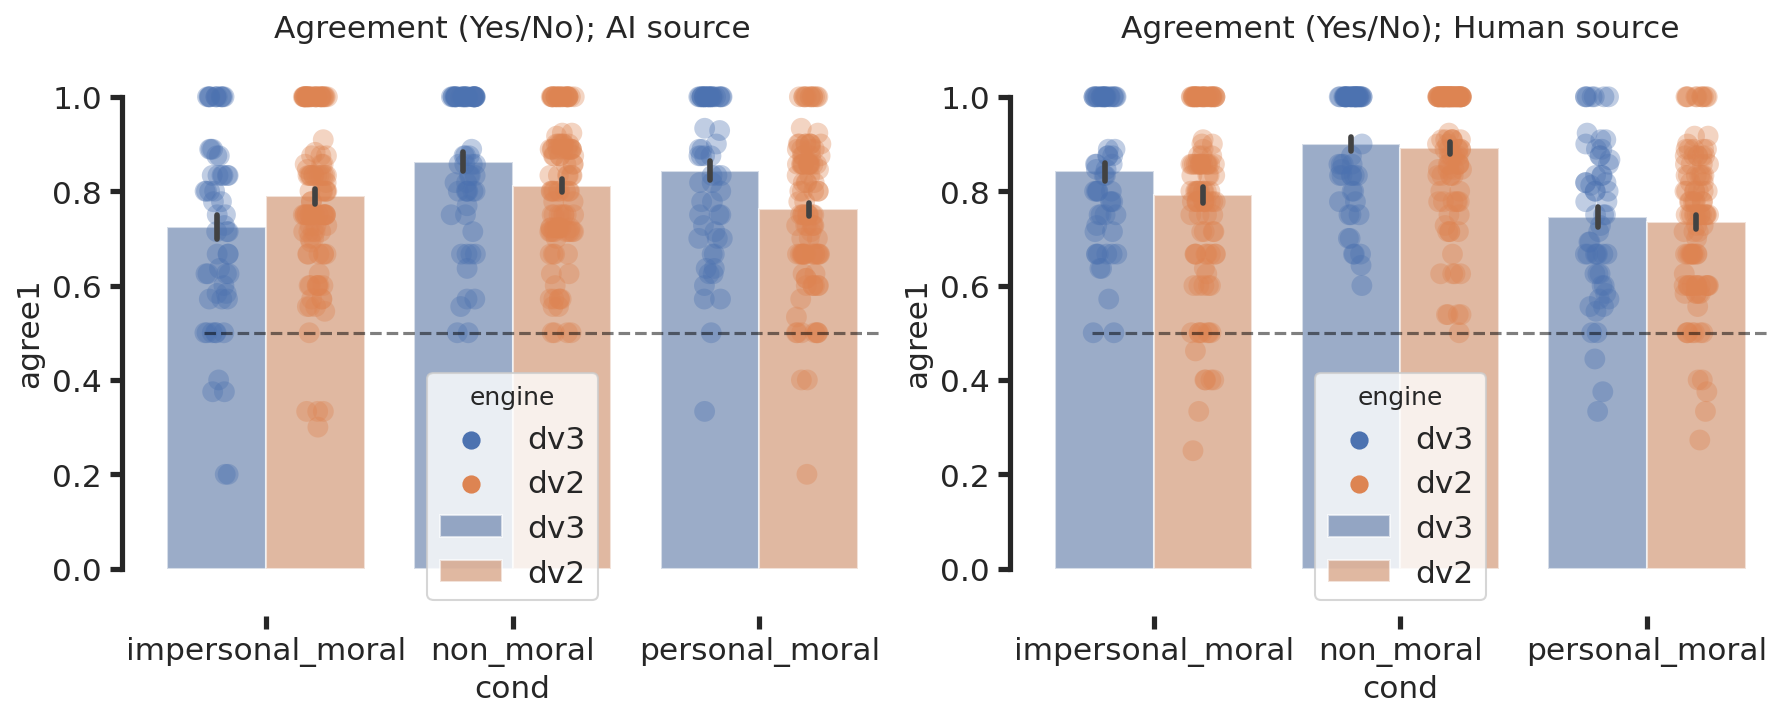

In [ ]:
sns.set(
    rc={'figure.figsize':(14,5), "figure.dpi": 150, 'legend.fontsize': 15, 'axes.labelsize': 15, 'axes.titlesize': 15,
      'xtick.labelsize': 15, 'ytick.labelsize': 15, 'font.family': 'sans-serif',
      'font.sans-serif': 'Arial', 'text.usetex': False})
# set S2 as default style
plt.rcParams['ytick.major.width'] = 2.5
plt.rcParams['xtick.major.width'] = 2.5


# sns.set_palette('Set2')
sns.set_palette('deep')
sns.set_style("ticks")

# -------------------------------------------------------------------------------
# Plot:  agreement 1 per correct and source + anova
# -------------------------------------------------------------------------------

avg = df[df.source=='AI'].groupby(['prolific_id', 'cond', 'engine'], as_index=False).mean()
plt.subplot(1, 2, 1)
# avg = df.groupby(['prolific_id', 'cond', 'agree1'], as_index=False).mean()
plt.plot([-0.25, 3.25], [0.5, 0.5], '--', color='black', alpha=0.5)
# raincloud(x='source', y='agree_both', markersize=12, df=avg, order=['AI', 'Human'])
sns.barplot(x='cond', y='agree1', hue='engine',data=avg, ci=68, alpha=0.6)
sns.stripplot(x='cond', y='agree1', data=avg, hue='engine', alpha=0.35, jitter=0.1, size=10, dodge=True, zorder=1)
plt.ylim(-.1, 1.1)
plt.title('Agreement (Yes/No); AI source')
# plt.xticks(range(2), ('', ''))
# plt.xlabel('')
# plt.xticks([])
# for i, c in enumerate(avg.source.unique()):
    # offset_image(i, c, plt.gca(), size=0.3)
sns.despine(offset=10, trim=True, bottom=True);
plt.gca().spines['left'].set_linewidth(2.5)
plt.gca().spines['bottom'].set_linewidth(2.5)
# plt.legend([], [], frameon=False)
print(pg.rm_anova(data=avg, dv='agree1', within='cond', subject='prolific_id', detailed=True))


#plt.plot([-0.25, 3.25], [0.5, 0.5], '--', color='black', alpha=0.5)
## raincloud(x='source', y='agree_both', markersize=12, df=avg, order=['AI', 'Human'])
#sns.barplot(x='cond', y='correct', data=avg, ci=68, alpha=0.6)
#sns.stripplot(x='cond', y='correct', data=avg, alpha=0.35, jitter=0.1, size=10, dodge=True, zorder=1)
#plt.ylim(-.1, 1.1)
#plt.title('Accuracy Turing')
#plt.xticks(range(2), ('', ''))
#plt.xlabel('')
#plt.xticks([])
## for i, c in enumerate(avg.source.unique()):
#    # offset_image(i, c, plt.gca(), size=0.3)
#sns.despine(offset=10, trim=True, bottom=True);
#plt.gca().spines['left'].set_linewidth(2.5)
#plt.gca().spines['bottom'].set_linewidth(2.5)
#plt.legend([], [], frameon=False)
#print(pg.rm_anova(data=avg, dv='correct', within='cond', subject='prolific_id', detailed=True))


# -------------------------------------------------------------------------------
# Plot:  agreement 2 per correct and source + anova
# -------------------------------------------------------------------------------
#
avg = df[df.source=='Human'].groupby(['prolific_id', 'cond', 'engine'], as_index=False).mean()
plt.subplot(1, 2, 2)
# avg = df.groupby(['prolific_id', 'cond', 'agree1'], as_index=False).mean()
plt.plot([-0.25, 3.25], [0.5, 0.5], '--', color='black', alpha=0.5)
# raincloud(x='source', y='agree_both', markersize=12, df=avg, order=['AI', 'Human'])
sns.barplot(x='cond', y='agree1', hue='engine',data=avg, ci=68, alpha=0.6)
sns.stripplot(x='cond', y='agree1', data=avg, hue='engine', alpha=0.35, jitter=0.1, size=10, dodge=True, zorder=1)
plt.ylim(-.1, 1.1)
plt.title('Agreement (Yes/No); Human source')
# plt.xticks(range(2), ('', ''))
# plt.xlabel('')
# plt.xticks([])
# for i, c in enumerate(avg.source.unique()):
    # offset_image(i, c, plt.gca(), size=0.3)
sns.despine(offset=10, trim=True, bottom=True);
plt.gca().spines['left'].set_linewidth(2.5)
plt.gca().spines['bottom'].set_linewidth(2.5)
# plt.legend([], [], frameon=False)
print(pg.rm_anova(data=avg, dv='agree1', within='cond', subject='prolific_id', detailed=True))
